In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

df=pd.read_csv('Students.csv')
df.head()

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   30 non-null     int64
 1   Marks   30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [3]:
df.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


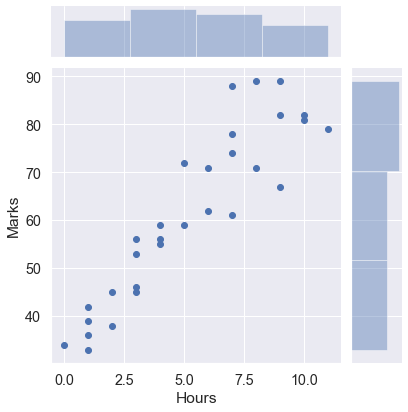

In [4]:
sns.jointplot(x='Hours',y='Marks',data=df,kind='scatter')

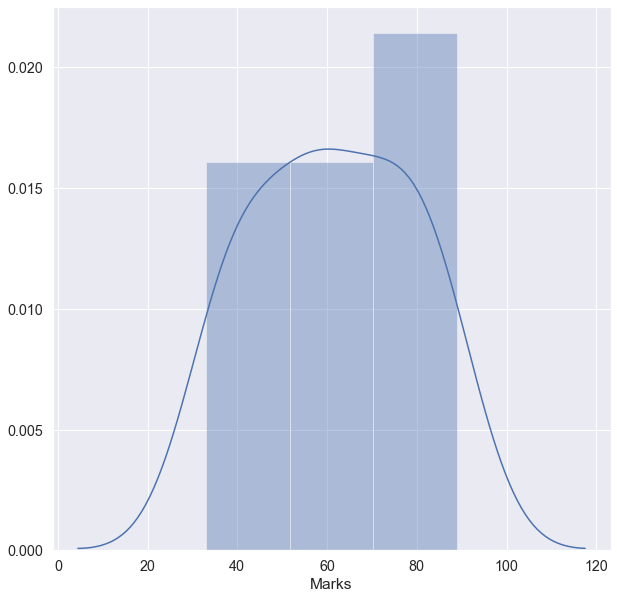

In [5]:
sns.distplot(df['Marks'],kde=True)

## The marks seem Normally Distributed

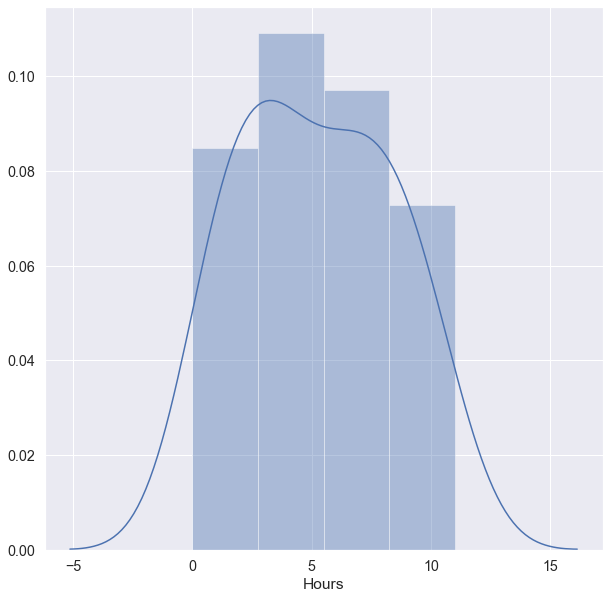

In [6]:
sns.distplot(df['Hours'],kde=True)

In [7]:
from sklearn.model_selection import train_test_split
x = df['Hours'].values.reshape(-1, 1)
y = df['Marks']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [9]:
ypred=lm.predict(xtest)

In [10]:
print(lm.intercept_)

34.87037882245551


In [11]:
print(lm.coef_)

[5.01757188]


In [12]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
print(f'The r2 value of the regression is {r2_score(ytest,ypred)}')
print(f'The RMSE value of the regression is {sqrt(mean_squared_error(ytest,ypred))}')

The r2 value of the regression is 0.8538655334937387
The RMSE value of the regression is 5.649978969000284


In [13]:
lm.predict([[8]]) # if student spend 8 hours studying the mark will be 75.63 %

array([75.0109539])

In [14]:
import statsmodels.formula.api as smf
lm=smf.ols(formula ='Marks ~ Hours',data=df).fit()

In [15]:
lm.conf_int()

,0,1
Intercept,29.658564,40.273594
Hours,4.209320,5.957573


In [16]:
lm.pvalues

Intercept    8.895591e-14
Hours        1.770385e-12
dtype: float64

In [17]:
lm.rsquared

0.8352029098744476

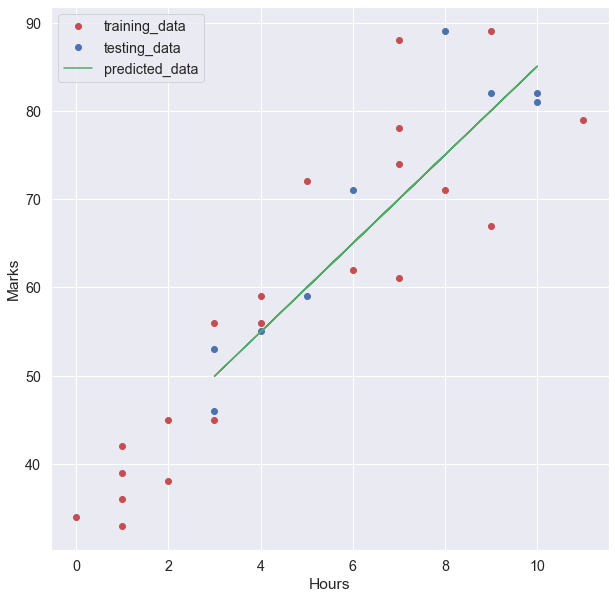

In [18]:
import matplotlib.pyplot as plt

plt.plot(xtrain, ytrain, 'ro', label='training_data')
plt.plot(xtest, ytest, 'bo', label='testing_data')
plt.plot(xtest, ypred, 'g-', label='predicted_data')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()